# SI 618 - Homework #3: Data Visualization

Version 2022.01.30.1.CT

## Background

This homework assignment focuses on the visual analysis of the COVID-19 data avaiable here: https://covid19datahub.io/articles/api/python.html. A description of the dataset can be found at https://covid19datahub.io/articles/doc/data.html

Your main task in this assignment is to explore the data *using the data manipulation, analysis, and visualization methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas, matplotlib and seaborn documentation, as well as Stack Overflow, or other online resources.  

## Total Points and Rubric

Each question is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in 
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

* 'My unique name' : aarjun
* I have done this home in collaboration with Kashmira Sawant (ksawant)

## Getting the data


The following cell should install the most up-to-date version of the 
COVID-19 datahub.  Alternatively, you can consult the datahub documentation to download the data files directly.

In [2]:
pip install --upgrade covid19dh

Note: you may need to restart the kernel to use updated packages.


### Restart the kernel to import the module and access the data

In [1469]:
from covid19dh import covid19

## Answer the questions below. 
For each question, you should
1. Write code that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

In [1470]:
# Load all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### <font color='#8B0000'> Q1 How many different countries are represented in the country-level data set?</font>
- Refer to the documentation to call the covid19() function with appropriate parameters (https://covid19datahub.io/articles/api/python.html)

In [1471]:
x, src = covid19(level=1, verbose=False, raw=False)
Total_countries_in_dataset = x.iso_alpha_3.nunique()
print(f"{Total_countries_in_dataset} countries are represented in the COVID 19 dataset")

199 countries are represented in the COVID 19 dataset


In [1472]:
iso_codes = pd.read_csv("/Users/arjunanandapadmanabhan/Downloads/ISO/isocodes.csv")
Total_countries = iso_codes['Alpha-3 code'].nunique()

print(f"There are {Total_countries} countries in the world")


There are 246 countries in the world


In [1473]:
Total_representation = round((Total_countries_in_dataset/Total_countries)*100,2)
print(f"{Total_representation} % of the countries in the world are represented in the dataset")

80.89 % of the countries in the world are represented in the dataset


* The total number of countries represented in the dataset is 199. 
* The total representation of the countries around the world in the dataset is around 80.89%. 
* I have used the ISO codes to calculate the total number of countries in the world, i.e; 246. This is different from the U.N list as U.N has only 195 member countries and two non-member observer state (State of palestine and Vatican). U.N does not recognize many countries such as Taiwan (which is included in the dataset). 


### <font color='#8B0000'> Q2 Create a line chart that shows the total number of cases over time.</font>

In [1474]:
import datetime as dt
x, src = covid19(level=1, verbose=False, raw=True)
Total_cases = x[['date','confirmed']]
Total_cases.date = Total_cases.date.astype(str)
Total_cases  = Total_cases.dropna()
Total_confirmed = pd.DataFrame(Total_cases.groupby('date').mean('confirmed')).reset_index()
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Total number of cases over time')

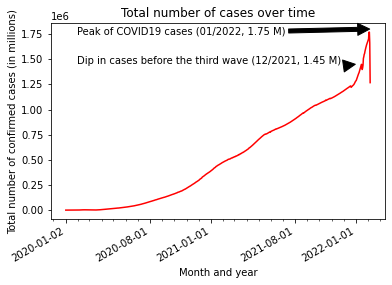

In [1475]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(Total_confirmed['date'], Total_confirmed['confirmed'], color='r')
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.annotate('Peak of COVID19 cases (01/2022, 1.75 M)', xy=('2022-06-01', 1800000), xytext=('2020-01-31', 1750000),\
             arrowprops=dict(facecolor='black', shrink=0.01),)
plt.annotate('Dip in cases before the third wave (12/2021, 1.45 M)', xy=('2021-12-31', 1450000), \
             xytext=('2020-01-31', 1450000), \
             arrowprops=dict(facecolor='black', shrink=0.01),)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 8)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.xlabel('Month and year')
plt.ylabel('Total number of confirmed cases (in millions)')
plt.title('Total number of cases over time')

* There is a gradual increase in COVID-19 cases from January 2020. 
* The current peak of cases is seen in January 2022. This peak is not real as more data is uploaded and we do not have sufficient data to prove that the cases are declining since January 2022. 
* However, when we look at the line plot, we can see a mild dip in cases in December 2021 before the third wave. 

### <font color='#8B0000'>Q3 Use the country-level data set to create a histogram to:</font>
- Show the distribution of values for the number of hospitalizations per 1000 people.  
- Draw a red vertical line that shows the median value on the histogram.

In [1476]:
Total_hospitalization = x[['hosp', 'iso_alpha_3']]
Total_hospitalization = Total_hospitalization.dropna()
Total_hospitalization_modified = Total_hospitalization.groupby('iso_alpha_3').sum('hosp').reset_index()
Total_hospitalization_modified = Total_hospitalization_modified.merge(x[['population','iso_alpha_3']], how='left')

In [1477]:
Total_hospitalization_modified['hospitalization'] = (Total_hospitalization_modified['hosp'].\
                                                    div(Total_hospitalization_modified['population']))*1000

Total_hospitalization_modified = Total_hospitalization_modified.drop_duplicates(subset=['iso_alpha_3'])
Total_hospitalization_modified.sort_values('hospitalization', ascending=False)

,iso_alpha_3,hosp,population,hospitalization
2201,BGR,2366826.0,7025037.0,336.912959
28344,SRB,2207406.0,6982604.0,316.129341
13911,HUN,1958145.0,9775564.0,200.310182
17587,JPN,24775374.0,126529100.0,195.807715
18330,LTU,545798.0,2801543.0,194.820497
11818,GLP,76418.0,395700.0,193.121051
21259,MTQ,67907.0,376480.0,180.373459
10316,FRA,11537218.0,66977107.0,172.256141
25466,POL,6343354.0,37974750.0,167.041363
6631,CZE,1764591.0,10629928.0,166.002159


In [1478]:
print(Total_hospitalization_modified.describe())
print(len(Total_hospitalization_modified))

               hosp    population  hospitalization
count  4.400000e+01  4.400000e+01        44.000000
mean   2.872783e+06  2.379231e+07       110.252872
std    6.432366e+06  5.280402e+07        75.012737
min    6.909000e+03  2.565180e+05        13.649124
25%    1.220955e+05  2.037214e+06        51.660182
50%    5.786790e+05  7.769132e+06        95.430723
75%    2.247261e+06  2.029254e+07       162.379042
max    3.379195e+07  3.266875e+08       336.912959
44


Text(0.5, 1.0, 'Number of hospitalizations per 1000 people')

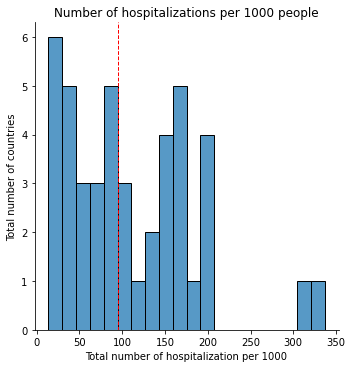

In [1479]:
sns.displot(x=Total_hospitalization_modified['hospitalization'], data= Total_hospitalization_modified, bins=20)
plt.axvline(x=Total_hospitalization_modified['hospitalization'].median(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel('Total number of hospitalization per 1000')
plt.ylabel('Total number of countries')
plt.title('Number of hospitalizations per 1000 people')

* Out of the 199 countries, only 44 countries have reported their hospitalization numbers. 
* The median value for hospitalization per 1000 people (for the 44 countries) is 95.43.
* The average value for hospitalization per 1000 people (for the 44 countries) is 110.25.
* There are only two countries with hospitalization per 1000 people more than 300 (Bulgaria and Serbia).

### <font color='#8B0000'> Q4 Create a visualization that shows the  number of tests per day in the United States and indicate the median value on your visualization.</font>

In [1480]:
y,scr = covid19("USA", level = 1, raw=True)
Total_test = y[['tests', 'date']]
a = y[['tests']]
a = a.dropna()
Total_test= Total_test.dropna()
Total_test['testsperday'] = a.diff(axis=0)
Total_test

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


,tests,date,testsperday
70227,348.0,2020-03-01,NaN
70228,862.0,2020-03-02,514.0
70229,1484.0,2020-03-03,622.0
70230,2371.0,2020-03-04,887.0
70231,3572.0,2020-03-05,1201.0
...,...,...,...
70922,777738298.0,2022-01-25,1755768.0
70923,779609487.0,2022-01-26,1871189.0
70924,781424215.0,2022-01-27,1814728.0
70925,782995073.0,2022-01-28,1570858.0


In [1481]:
Total_test['testsperday'].sort_values(ascending=False)
Total_test['testsperday'].median()

1038373.0

In [1482]:
Total_test['testsperday'].describe()

count    6.990000e+02
mean     1.121555e+06
std      6.126196e+05
min      5.140000e+02
25%      6.688910e+05
50%      1.038373e+06
75%      1.557277e+06
max      3.083703e+06
Name: testsperday, dtype: float64

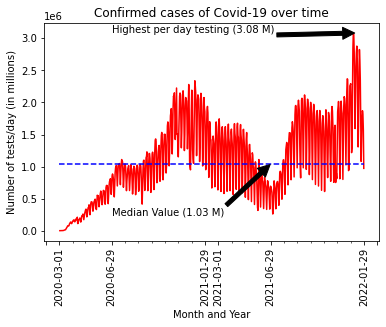

In [1483]:
Total_test.date = Total_test.date.astype(str)
f, ax = plt.subplots()
ax.plot(Total_test["date"], Total_test["testsperday"], "r")
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.title("Confirmed cases of Covid-19 over time", size=12)
y_median = [(Total_test["testsperday"].median())]*len(Total_test["testsperday"])
plt.annotate('Median Value (1.03 M)', xy=('2021-06-29', 1038373.0), xytext=('2020-06-29', 238373.0), \
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('Highest per day testing (3.08 M)', xy=('2022-01-10', 3083730.0), xytext=('2020-06-29', 3083730.0), \
             arrowprops=dict(facecolor='black', shrink=0.01))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 5,12)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation = 90)
ax.plot(Total_test["date"], y_median, "b--", )
plt.xlabel('Month and Year')
plt.ylabel('Number of tests/day (in millions)')
plt.show()

* The total number of tests per day done in the USA have consistently increased over the years ( since the begining of the pandemic) with a slight dip around July 2021. Currently, the median value of the tests done in USA is 1038373.0  

## For questions below:
- You will have to call the covid19() function again **with parameters specific to Canada**. 
- Set the parameter <code>level = 2</code> in the call to covid19().

In [1484]:
canada,src = covid19("CAN",level = 2)


We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


### <font color='#8B0000'> Q5 Create a bar plot to show the number of tests conducted in each province.  </font>
Order the provinces from west to east (use your best judgement for cases where the order is unclear).  Which Canadian province that has conducted the most tests?

Text(0, 0.5, 'Test conducted (in millions)')

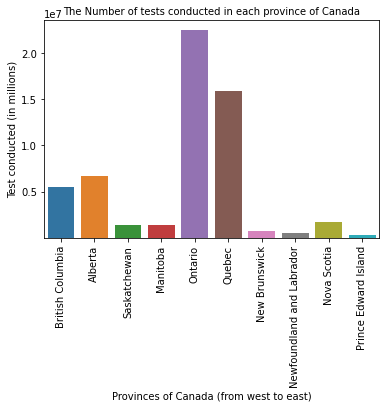

In [1485]:
a = canada[['administrative_area_level_2', 'tests']]
a= a.dropna()
b = a.groupby(['administrative_area_level_2']).max('tests').reset_index()
ax = sns.barplot(x="administrative_area_level_2", y="tests",\
                 order=["British Columbia", "Alberta", "Saskatchewan","Manitoba", "Ontario", "Quebec", \
                        "New Brunswick", "Newfoundland and Labrador", "Nova Scotia","Prince Edward Island",\
                        ], data=b)
plt.ylim(5000, 23512593.0)
plt.xticks(rotation = 90)
plt.title('The Number of tests conducted in each province of Canada', size = 10)
plt.xlabel('Provinces of Canada (from west to east)')
plt.ylabel('Test conducted (in millions)')



* From the bar graph above, Ontario has conducted the maximum number of tests till date (22 million) followed by Quebec (15.91 million).
* I have excluded the three territories from the comparison as the question has specifically mentioned provinces of Canada. 

### <font color='#8B0000'> Q6 Create a bar plot that shows the number of tests conducted per 1000 people for each province in Canada.</font>
How would you interpret the results of this bar plot given the results of bar plot in question 5. 

In [1486]:
c = a.groupby(['administrative_area_level_2']).mean('tests').reset_index()

Text(0, 0.5, 'Number of tests conducted per 1000 people')

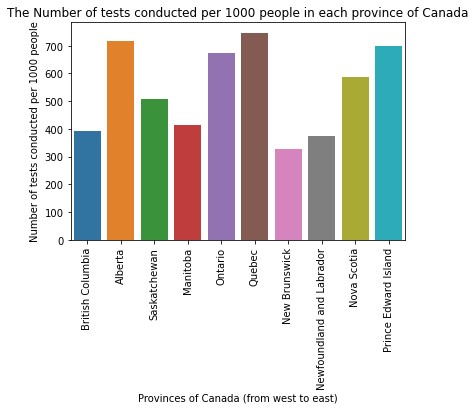

In [1487]:
test_1000 = c.merge(canada[['population', 'administrative_area_level_2']], on='administrative_area_level_2',\
                    how='left')
test_1000 = test_1000.drop_duplicates()
test_1000['testper1000'] = (test_1000['tests'].div(test_1000['population'].div(1000)))
av = sns.barplot(x="administrative_area_level_2", y="testper1000",\
                 order=["British Columbia", "Alberta", "Saskatchewan","Manitoba", "Ontario", "Quebec", \
                        "New Brunswick", "Newfoundland and Labrador", "Nova Scotia","Prince Edward Island",\
                        ], data=test_1000)
plt.xticks(rotation = 90)
plt.title('The Number of tests conducted per 1000 people in each province of Canada', size = 12)
plt.xlabel('Provinces of Canada (from west to east)')
plt.ylabel('Number of tests conducted per 1000 people')

* When comparing with the graph above, even though Quebec has conducted overall less tests than Ontario, they have carried out more tests per 1000 population (more than 750 tests per 1000 people) and Ontario has done less tests per 1000 population (around 670 tests per 1000 people). 
* Also interesting fact to note is that Prince Edward Island has conducted least amount of COVID 19 tests. However, when we view the number as tests conducted per 1000 people, they have conducted 700 tests per 1000 people, which is more than Ontario. 


### <font color='#8B0000'> Q7 Create a visualization that shows which Canadian province has the highest recovery rate. </font>
Recovery rate is calculated as the number of recovered cases divided by the number of confirmed cases.

In [1497]:
recovery_rate = canada[['administrative_area_level_2', 'recovered', 'confirmed']]
recovery_rate = recovery_rate.dropna()
recovery_rate = recovery_rate.groupby('administrative_area_level_2').max('recovered').reset_index()

Text(0, 0.5, 'Recovery rate (in percentage)')

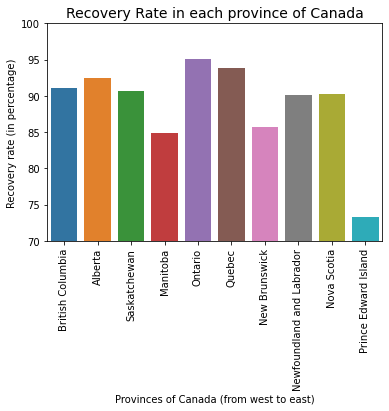

In [1498]:

recovery_rate['recovery_rate'] = round((recovery_rate['recovered']/recovery_rate['confirmed'])*100,2)
am = sns.barplot(x="administrative_area_level_2", y="recovery_rate",\
                 order=["British Columbia", "Alberta", "Saskatchewan","Manitoba", "Ontario", "Quebec", \
                        "New Brunswick", "Newfoundland and Labrador", "Nova Scotia","Prince Edward Island",\
                        ], data=recovery_rate)
plt.xticks(rotation = 90)
plt.ylim(70, 100)
plt.title('Recovery Rate in each province of Canada', size = 14)
plt.xlabel('Provinces of Canada (from west to east)')
plt.ylabel('Recovery rate (in percentage)')

* The recovery rate of Ontario is highest folllowed by Quebec. Whereas the recovery rate of Prince Edward Island is the lowest of all provinces. 

(Use this space to explain your answers)

### <font color='#8B0000'> Q8 Create visualizations that show the impacts of _at least_ three policy measures on mortality or infection rates.</font>


See https://covid19datahub.io/articles/doc/data.html for descriptions of the available policy measures.  You are not limited to histograms and bar charts.  Remember that you can use subplots!


In [1499]:
canada1,src = covid19("CAN",level = 2, start='2021-01-01', end='2021-12-30')
mortality_rate = canada1[['date','administrative_area_level_2', 'testing_policy','elderly_people_protection','transport_closing', 'gatherings_restrictions', 'facial_coverings','deaths', 'stay_home_restrictions', 'internal_movement_restrictions', 'population']]
mortality_rate = mortality_rate.dropna()
mortality_rate

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


,date,administrative_area_level_2,testing_policy,elderly_people_protection,transport_closing,gatherings_restrictions,facial_coverings,deaths,stay_home_restrictions,internal_movement_restrictions,population
3770,2021-01-01,Prince Edward Island,2.0,2.0,0.0,3.0,3.0,0.0,1.0,2.0,158158
3771,2021-01-02,Prince Edward Island,2.0,2.0,0.0,3.0,3.0,0.0,1.0,2.0,158158
3772,2021-01-03,Prince Edward Island,2.0,2.0,0.0,3.0,3.0,0.0,1.0,2.0,158158
3773,2021-01-04,Prince Edward Island,2.0,2.0,0.0,3.0,3.0,0.0,1.0,2.0,158158
3774,2021-01-05,Prince Edward Island,2.0,2.0,0.0,3.0,3.0,0.0,1.0,2.0,158158
...,...,...,...,...,...,...,...,...,...,...,...
494819,2021-12-26,Northwest Territories,2.0,2.0,-1.0,3.0,3.0,12.0,1.0,2.0,44904
494820,2021-12-27,Northwest Territories,2.0,2.0,-1.0,3.0,3.0,12.0,1.0,2.0,44904
494821,2021-12-28,Northwest Territories,2.0,2.0,-1.0,3.0,3.0,12.0,1.0,2.0,44904
494822,2021-12-29,Northwest Territories,2.0,2.0,-1.0,3.0,3.0,12.0,1.0,2.0,44904


In [1500]:
mortality_rate['mortality_rate'] = (mortality_rate['deaths'].div(mortality_rate['population']))*1000
mortality_rate['internal_movement_restrictions'] = abs(mortality_rate['internal_movement_restrictions'])
mortality_rate['testing_policy'] = abs(mortality_rate['testing_policy'])
mortality_rate['stay_home_restrictions'] = abs(mortality_rate['stay_home_restrictions'])
mortality_rate['facial_coverings'] = abs(mortality_rate['facial_coverings'])
mortality_rate['elderly_people_protection'] = abs(mortality_rate['elderly_people_protection'])

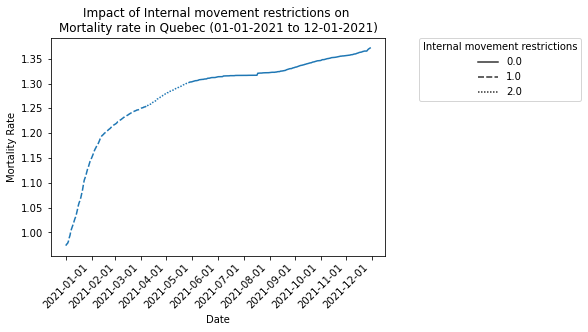

In [1501]:
mortality_rate2 = mortality_rate[['date', 'internal_movement_restrictions',\
                                  'administrative_area_level_2', 'mortality_rate']]
mortality_rate2 = mortality_rate2[mortality_rate2['administrative_area_level_2'] == 'Quebec']
mortality_rate2.date = mortality_rate2.date.astype(str)
f, ax = plt.subplots()
sns.lineplot(x=mortality_rate2['date'], y=mortality_rate2['mortality_rate'], \
             style = mortality_rate2['internal_movement_restrictions'],data=mortality_rate2)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=()))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation = 45, size=10)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0., title="Internal movement restrictions")
plt.xlabel('Date')
plt.ylabel('Mortality Rate')
plt.title('Impact of Internal movement restrictions on \nMortality rate in Quebec (01-01-2021 to 12-01-2021)')
plt.show()

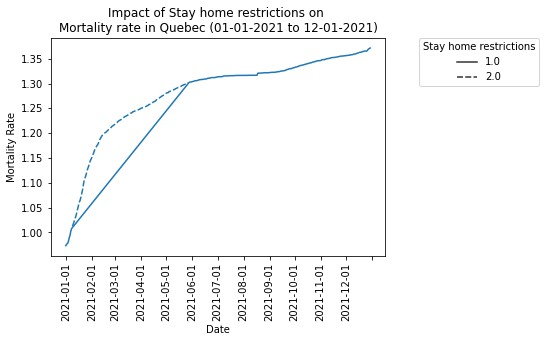

In [1502]:
mortality_rate3 = mortality_rate[['date', 'stay_home_restrictions','administrative_area_level_2', 'mortality_rate']]
mortality_rate3 = mortality_rate3[mortality_rate3['administrative_area_level_2'] == 'Quebec']
mortality_rate3.date = mortality_rate3.date.astype(str)
f, ax = plt.subplots()
sns.lineplot(x=mortality_rate3['date'], y=mortality_rate3['mortality_rate'], \
             style = mortality_rate3['stay_home_restrictions'],data=mortality_rate3)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=()))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0., title="Stay home restrictions")
plt.xlabel('Date')
plt.ylabel('Mortality Rate')
plt.title('Impact of Stay home restrictions on \nMortality rate in Quebec (01-01-2021 to 12-01-2021)')
plt.show()

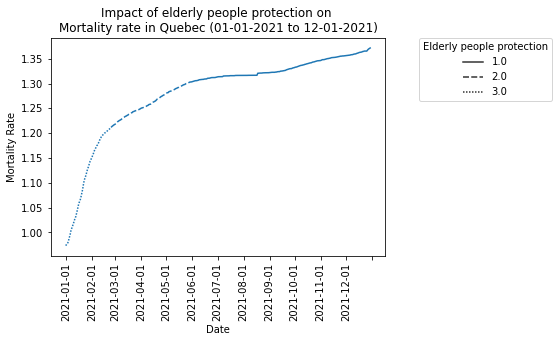

In [1503]:
mortality_rate4 = mortality_rate[['date', 'elderly_people_protection',\
                                  'administrative_area_level_2', 'mortality_rate']]
mortality_rate4.date = mortality_rate4.date.astype(str)
mortality_rate4 = mortality_rate4[mortality_rate4['administrative_area_level_2'] == 'Quebec']
f, ax = plt.subplots()
sns.lineplot(x=mortality_rate4['date'], y=mortality_rate4['mortality_rate'], \
             style = mortality_rate4['elderly_people_protection'],data=mortality_rate4)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=()))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0., title="Elderly people protection")
plt.xlabel('Date')
plt.ylabel('Mortality Rate')
plt.title('Impact of elderly people protection on \nMortality rate in Quebec (01-01-2021 to 12-01-2021)')
plt.show()

* I have selected Quebec for visualizaing the impact of policies on mortality rate. The time period that I have chosen for my visualization is from January 01, 2021 to December 30, 2021. The reason behind chosing this timeline is because the COVID 19 pandemic was uncertain during that time and we had two waves during that period of time, therefore, there were many policy changes (relaxation or tigtening of the policies). 
* When we look at the line plot for impact of internal movement restriction on mortality rate, we can see that Quebec had moderate policy for internal movement (01:  recommend not to travel between regions/cities) during the start of the year and they tigetened the policy around April 2021 (02: internal movement restrictions in place). This lead to flattening of the curve. However, they relaxed the policy in June 2021 and this lead to increase in mortality rate in later half of the year. 
* When we look at the line plot for impact of stay home restriction on mortality rate, we can see that Quebec had moderate policy for stay home restriction (02:  require not leaving house with exceptions for daily exercise, grocery shopping, and ‘essential’ trips) during the start of the year and they relaxed the policy around June 2021 (01: ecommend not leaving house ). This lead to increase in mortality rate in later half of the year. 

* When we look at the line plot for impact of elderly people protection on mortality rate, we can see that Quebec had stringent policy for elderly people protection (03:  Extensive restrictions for isolation and hygiene in LTCFs, all non-essential external visitors prohibited, and/or all elderly people required to stay at home and not leave the home with minimal exceptions, and receive no external visitors) and they relaxed the measures/policies gradually (from 03 to 02 and finally to 01 at the later half of the year. This lead to increase in mortality rate in later half of the year. 

## <font color='green'> Please submit your completed notebook in .IPYNB and .HTML formats via Canvas </font>